In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('student_data.csv')
x = df[['Hours_Studied','Review_Session']]
y = df['Results']

#### (1) create a visualization of the data, 

In [4]:
df.head()
# I'm not sure that what does data vitualization mean. So I created scatter plot of each feature compared  with target value

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


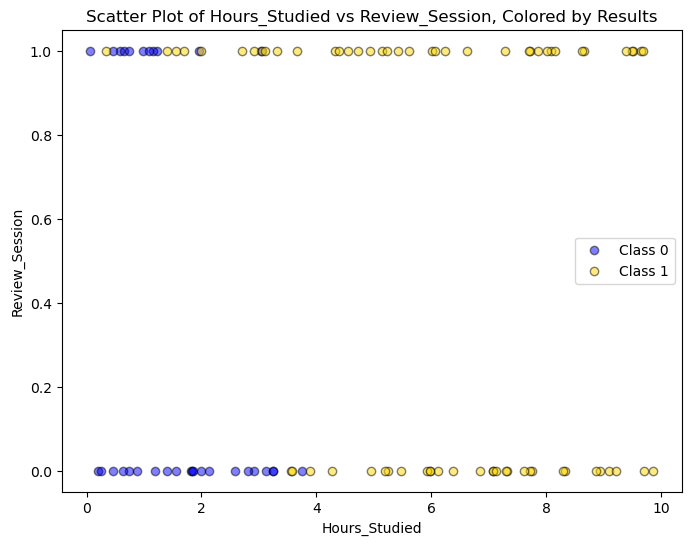

In [5]:
# Create a scatter plot with different colors for different target values
plt.figure(figsize=(8, 6))

# Plot data points where target = 0
plt.scatter(x[y == 0]['Hours_Studied'], x[y == 0]['Review_Session'], color='blue', label='Class 0', edgecolor='k',alpha = 0.5)

# Plot data points where target = 1
plt.scatter(x[y == 1]['Hours_Studied'], x[y == 1]['Review_Session'], color='gold', label='Class 1', edgecolor='k',alpha = 0.5)

# Add labels, title, and legend
plt.xlabel('Hours_Studied')
plt.ylabel('Review_Session')
plt.title('Scatter Plot of Hours_Studied vs Review_Session, Colored by Results')
plt.legend()

# Show the plot
plt.show()
       

#### (2) fit a model using logistic regression,

In [7]:
# 2. Fit the logistic regression model
LR = LogisticRegression()
LR.fit(x, y)

LogisticRegression()

#### (3) output model coefficients and performance metrics such as accuracy and AUC and ROC;

Model Coefficients: [[1.36542016 1.87797591]]
Intercept: [-4.61373892]
Accuracy: 0.93
AUC Score: 0.9761029411764706


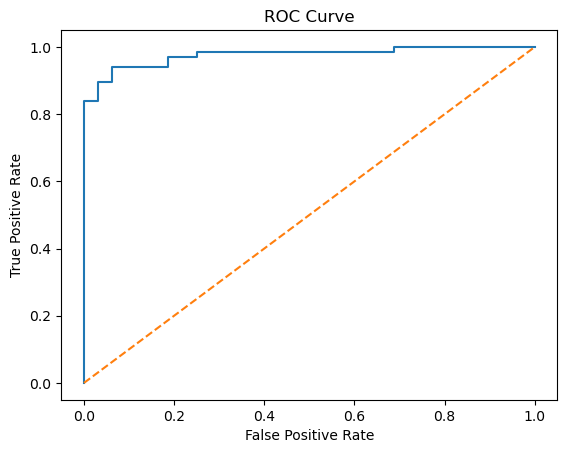

In [9]:
# 3. Output model coefficients and performance metrics
coefficients =LR.coef_
intercept = LR.intercept_

# Predict probabilities and class labels
y_pred_prob = LR.predict_proba(x)[:, 1]
y_pred = LR.predict(x)
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate AUC and ROC curve
auc = roc_auc_score(y, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# Print results
print("Model Coefficients:", coefficients)
print("Intercept:", intercept)
print("Accuracy:", accuracy)
print("AUC Score:", auc)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Task 2:  Understanding and Prevent Overfitting in the context of SVM 
#### Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation. 



In [26]:
# Initialize the Support Vector Classifier with a linear kernel
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Fit the SVM model to the data
svm_linear.fit(x, y)
y_pred_linear = svm_linear.predict(x)
svm_rbf.fit(x, y)
y_pred_rbf = svm_rbf.predict(x)

# Show accuracy for each model 
print(f"Linear SVM Accuracy: {accuracy_score(y, y_pred_linear)}")
print(f"RBF SVM Accuracy: {accuracy_score(y, y_pred_rbf)}")

Linear SVM Accuracy: 0.92
RBF SVM Accuracy: 0.93


In [41]:
# Define the parameter grid for gamma
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=9)

# Initialize GridSearchCV to search for the best gamma
grid_search = GridSearchCV(svm_rbf, param_grid, cv=cv, scoring='accuracy')

# Fit the grid search model to find the best gamma
grid_search.fit(x, y)

# Get the best gamma parameter found by GridSearchCV
best_gamma = grid_search.best_params_['gamma']

# Print the best gamma value and the corresponding accuracy score
print(f"Best Gamma: {best_gamma}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

# Make predictions using the best found model
y_pred = grid_search.best_estimator_.predict(x)

# Calculate and print the accuracy of the model on the entire dataset
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy with Best Gamma on the Entire Dataset: {accuracy}")

Best Gamma: 10
Best Cross-Validation Accuracy: 0.9400000000000001
Accuracy with Best Gamma on the Entire Dataset: 0.96
